# Estimating impact factor using a random sample 


## Importing data and obtaining a random sample

First, let's import all the R packages we'll be needing.

In [1]:
#For handling data
suppressMessages(library(dplyr))

#For plotting data
library(ggplot2)
library(ggthemes)

#For conducting bootstrap analysis
library(boot)

Import the dataset (The path written there is the path on my laptop, and won't work for you). This dataset contains details of all manuscripts published in PNAS in the years 2014 and 2015 (Obtained from SCOPUS)

In [2]:
#Import data
data <- read.csv('all_papers_2014-15.csv')

data %>%
  filter(Document.Type == 'Article' | Document.Type == 'Review') %>%  #Select only articles and reviews
  select(Authors, Title, DOI,Year,Document.Type) -> data #Don't keep columns you don't need

We must next obtain a random sample of 26 articles (13 from each year) from this dataset. We'll accomplish this using the dplyr function *slice_sample*. Given a dataframe **df** and a number **n**, the function will return **n** random rows of **df**.<br>
We first use *filter* to select rows belonging to a particular year, and then use *slice_sample* to obtain a random sample.

In [3]:
set.seed(123456789) #Just so that my results are replicable for you, if you wish to re-run the code

data %>%
  filter(Year == 2014) %>% 
  slice_sample(n=13) -> year_1 #Random sample of 13 papers published in 2014

data %>% 
  filter(Year == 2015) %>% 
  slice_sample(n=13) -> year_2 #Random sample of 13 papers published in 2015

sample <- rbind(year_1,year_2) #Use a single dataframe for the entire sample

rm(data,year_1,year_2) #Just to save memory.

sample #Look at the sample

Authors,Title,DOI,Year,Document.Type
<fct>,<fct>,<fct>,<int>,<fct>
"Takayama, K., Morisaki, Y., Kuno, S., Nagamoto, Y., Harada, K., Furukawa, N., Ohtaka, M., Nishimura, K., Imagawa, K., Sakurai, F., Tachibana, M., Sumazaki, R., Noguchi, E., Nakanishi, M., Hirata, K., Kawabata, K., Mizuguchi, H.",Prediction of interindividual differences in hepatic functions and drug sensitivity by using human iPS-derived hepatocytes,10.1073/pnas.1413481111,2014,Article
"Ringgaard, S., Zepeda-Rivera, M., Wu, X., Schirner, K., Davis, B.M., Waldor, M.K.",ParP prevents dissociation of CheA from chemotactic signaling arrays and tethers them to a polar anchor,10.1073/pnas.1315722111,2014,Article
"Könneke, M., Schubert, D.M., Brown, P.C., Hügler, M., Standfest, S., Schwander, T., Schada Von Borzyskowski, L., Erb, T.J., Stahl, D.A., Berg, I.A.",Ammonia-oxidizing archaea use the most energy-efficient aerobic pathway for CO<inf>2</inf> fixation,10.1073/pnas.1402028111,2014,Article
"Tsoa, R.W., Coskun, V., Ho, C.K., De Vellis, J., Sun, Y.E.",Spatiotemporally different origins of NG2 progenitors produce cortical interneurons versus glia in the mammalian forebrain,10.1073/pnas.1400422111,2014,Article
"Pontzer, H., Raichlen, D.A., Gordon, A.D., Schroepfer-Walker, K.K., Hare, B., O'Neill, M.C., Muldoon, K.M., Dunsworth, H.M., Wood, B.M., Isler, K., Burkart, J., Irwin, M., Shumakerl, R.W., Lonsdorf, E.V., Ross, S.R.",Primate energy expenditure and life history,10.1073/pnas.1316940111,2014,Article
"Cvetkovic, C., Raman, R., Chan, V., Williams, B.J., Tolish, M., Bajaj, P., Sakar, M.S., Asada, H.H., Saif, M.T.A., Bashir, R.",Three-dimensionally printed biological machines powered by skeletal muscle,10.1073/pnas.1401577111,2014,Article
"Freeman, E.G., Wisotsky, Z., Dahanukar, A.",Detection of sweet tastants by a conserved group of insect gustatory receptors,10.1073/pnas.1311724111,2014,Article
"MacLennan, C.A., Saul, A.",Vaccines against poverty,10.1073/pnas.1400473111,2014,Review
"Sisu, C., Pei, B., Leng, J., Frankish, A., Zhang, Y., Balasubramanian, S., Harte, R., Wang, D., Rutenberg-Schoenberg, M., Clark, W., Diekhans, M., Rozowsky, J., Hubbard, T., Harrow, J., Gerstein, M.B.",Comparative analysis of pseudogenes across three phyla,10.1073/pnas.1407293111,2014,Article


We can now check how many 'research articles' and how many 'reviews' are present in our random sample (In this case, there are no reviews whatsoever)

In [4]:
sample %>%
    count(Document.Type)

Document.Type,n
<fct>,<int>
Article,25
Review,1


Each article is characterized by a unique DOI. We can (manually) search this DOI on google scholar with the appropriate year bounds to determine how many times each article was cited in the year 2016.

In [5]:
#Manually looked these up from google scholar.
#I tried scraping scholar but it turns out google really doesn't want people to scrape their sites.
#Google is, unfortunately, also considerably smarter than I am, which makes scraping it very hard.

citation_counts <- c(39,
                     4,
                     36,
                     9,
                     1,
                     38,
                     16,
                     6,
                     5,
                     11,
                     10,
                     22,
                     4,
                     1,
                     12,
                     15,
                     3,
                     14,
                     7,
                     14,
                     15,
                     14,
                     5,
                     6,
                     6,
                     11
                    )

sample <- cbind(sample,citation_counts)

# Visualizing the data using a histogram


We can now plot a histogram of the citation counts using the ggplot2 package

In [6]:
#This is just a convenient function to set the size of the figure that Jupyter notebook displays inline
figsize <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

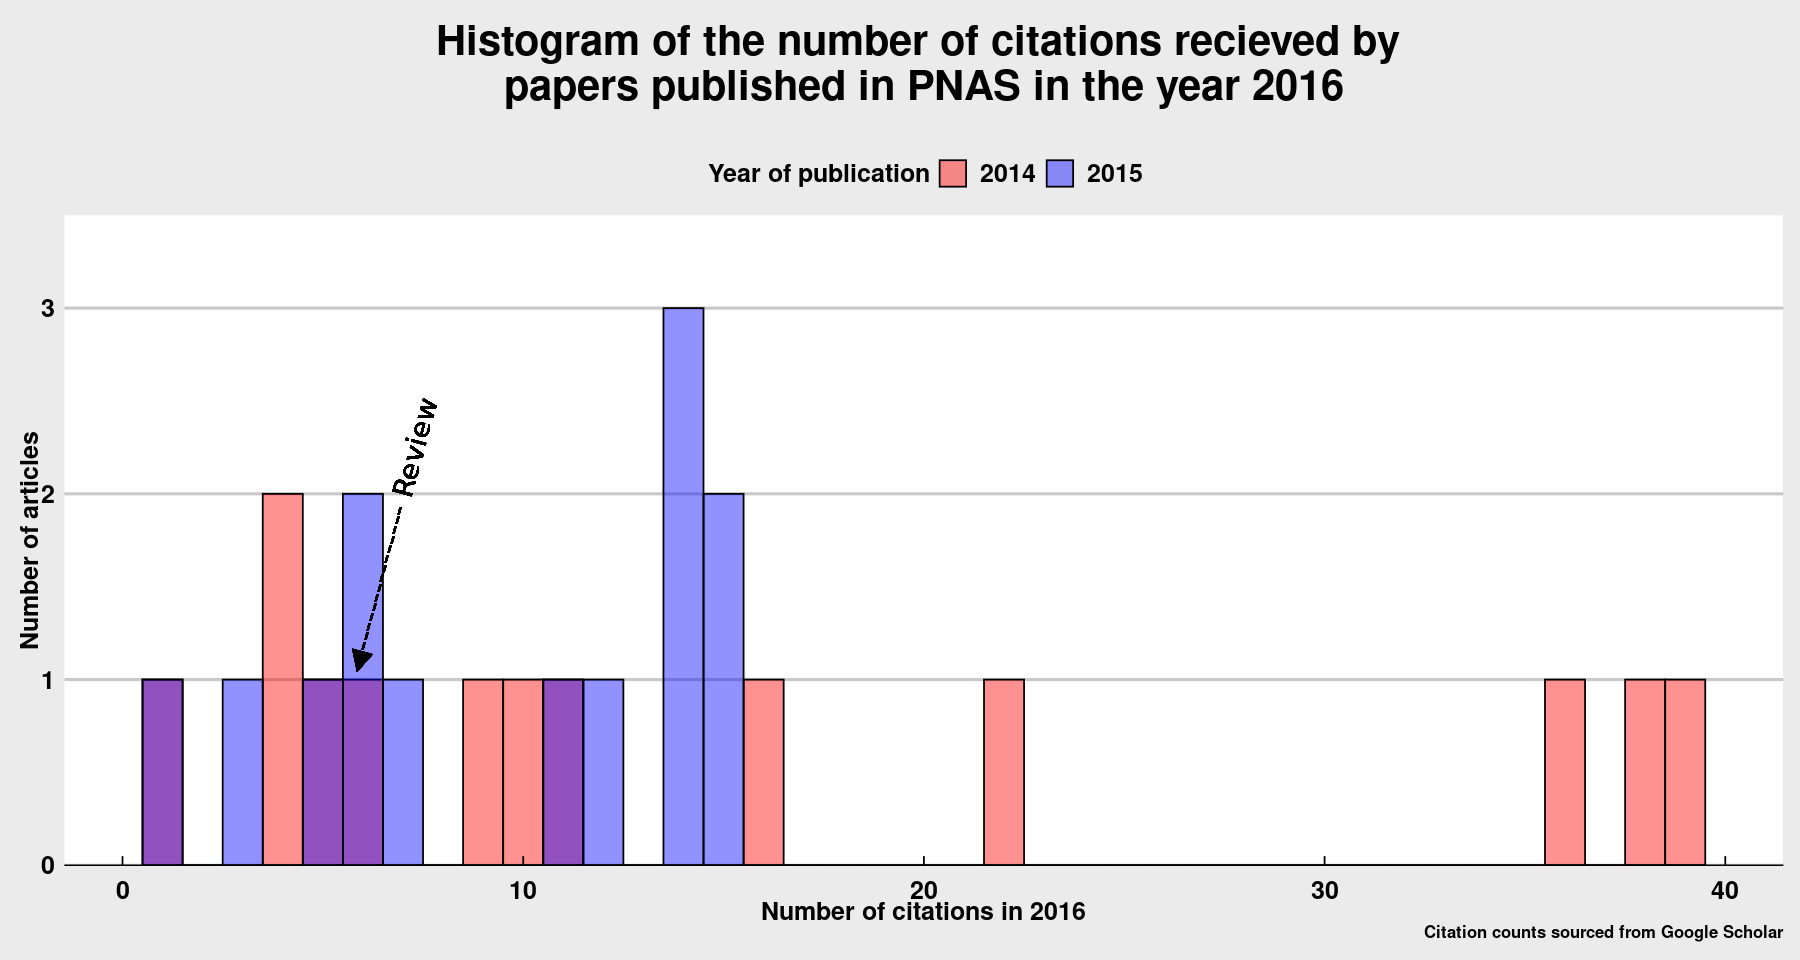

In [7]:
#Set the figsize
figsize(15,8)

#Make the plot.
p <- ggplot(sample,aes(x=citation_counts,fill=as.factor(Year)))
p <- p + geom_histogram(alpha=0.43,binwidth=1,color='black',position='identity')

#Add a marker to show where the review article is (We can do this since there's only one.)
p <- p + geom_text(aes(x=subset(sample,Document.Type=='Review')$citation_count+0.7,y=1.78,label='◀--------------- Review'),angle=75,size=6,family = "HiraKakuPro-W3")

#Add axis and legend labels
p <- p + labs(x="Number of citations in 2016",y="Number of articles",fill="Year of publication",caption="Citation counts sourced from Google Scholar")
p <- p + ggtitle("Histogram of the number of citations recieved by \n papers published in PNAS in the year 2016 \n")

#Some aesthetic changes

#Change the theme as a whole. I chose a theme where color overlaps can be clearly seen.
p <- p +theme_economist_white()

#Make axis labels bold
p <-p + theme(axis.text = element_text(face = 'bold', color = 'black',size = 15)) + theme(axis.title = element_text(face = 'bold',color = 'black',size = '15'))

#Make legend, title, and caption labels bold
p <- p + theme(legend.title = element_text(face='bold', color = 'black',size = 15),legend.text=element_text(face='bold', color = 'black',size = 15))
p <- p + theme(plot.caption = element_text(face='bold', color = 'black',size = 10,hjust=1))
p <- p + theme(plot.title = element_text(face='bold', color = 'black',size = 25,hjust=0.5))

#Remove the gap b/w bars and x-axis, and also set the y limits of the plot
p <- p + scale_y_continuous(expand = c(0,0),limits = c(0,3.5))

#Change the colors to something more visible
p <- p + scale_fill_manual(values=c("red","blue"))


#Display the plot
p

## Measures of central tendency

I consider two measures: The mean and the median.

In [8]:
mean <- mean(sample$citation_count)
median <- median(sample$citation_count)

cat("mean =",mean)
cat("\nmedian =",median)

mean = 12.46154
median = 10.5

The median is lower than the mean. This is because, as visible from the plot, there are a few papers that received a large number of citations. The mean is more sensitive to outliers and is thus more affected by these papers than the median.

We can also see this by plotting a frequency histogram with a density estimate.

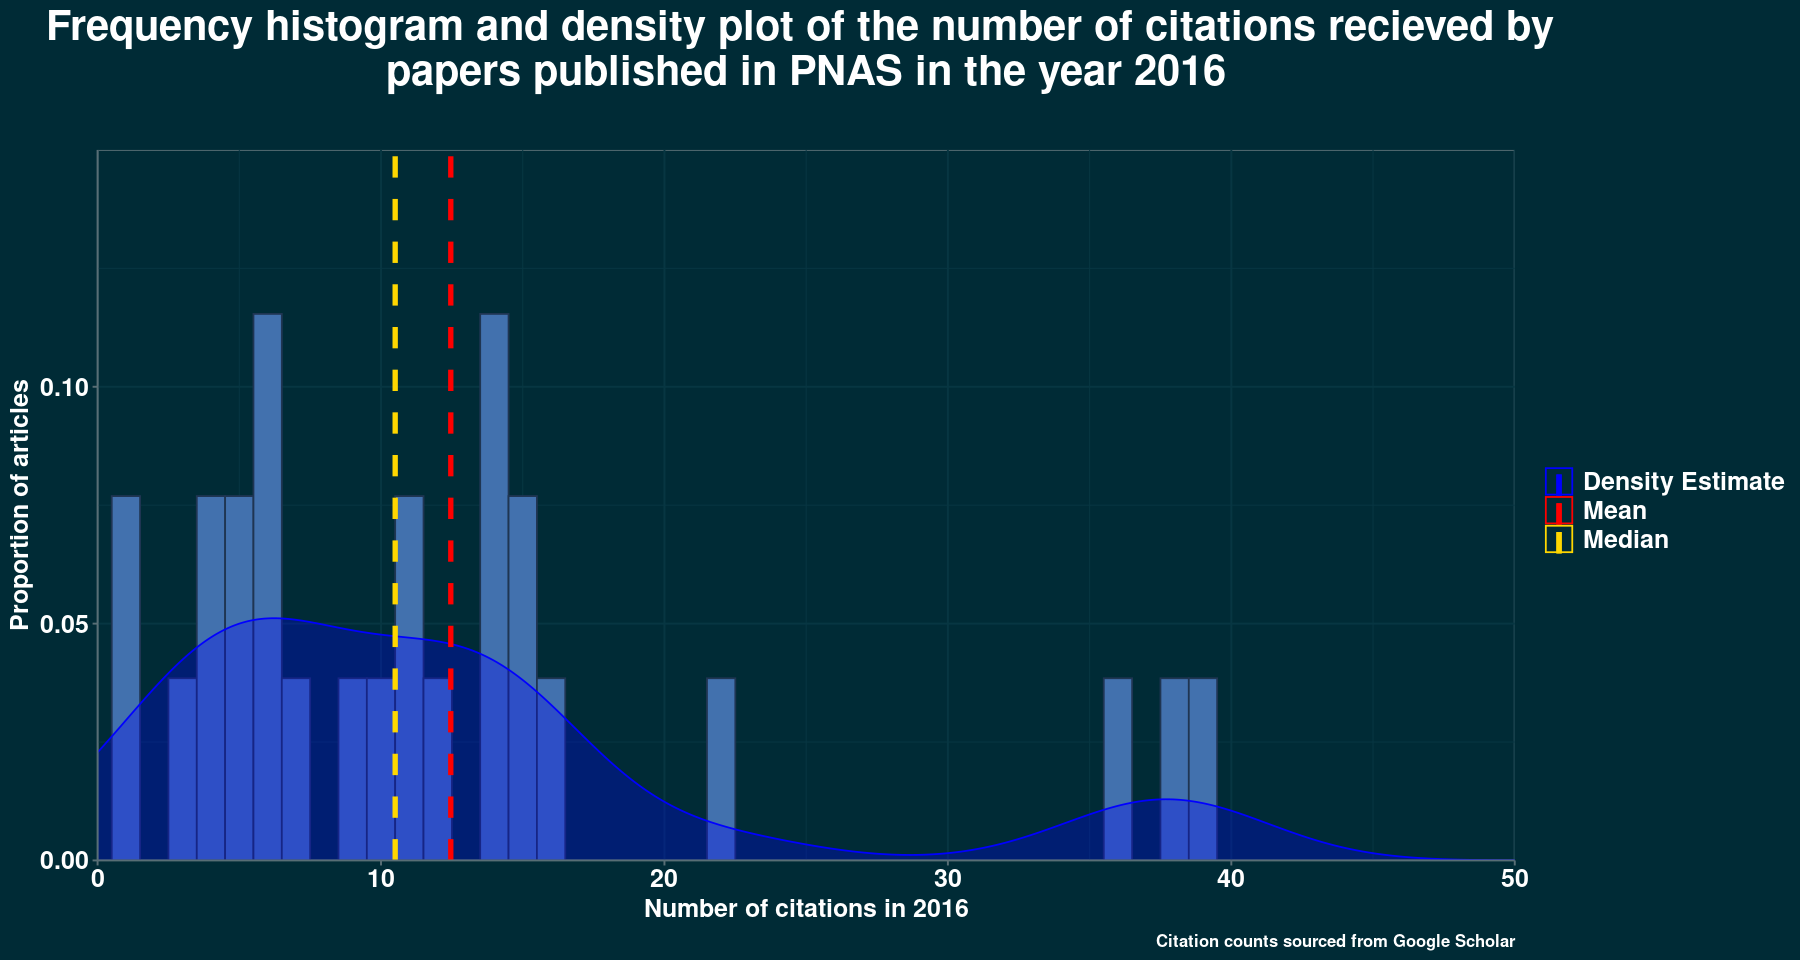

In [9]:
#Set the figsize
figsize(15,8)

#Make a frequency histogram
dens_plot <- ggplot(sample,aes(x=citation_counts))
dens_plot <- dens_plot + geom_histogram(binwidth=1,position='identity',fill='#4271AE',color='#1F3552',aes(y=..density..))


#Add a density estimate
dens_plot <- dens_plot + geom_density(aes(color='Density Estimate'),fill=NA,alpha=0.4)
dens_plot <- dens_plot + geom_density(color=NA,fill='#0000ff',alpha=0.3)

#Add mean and median
dens_plot <- dens_plot + geom_vline(aes(xintercept=mean,color='Mean'),linetype='dashed',size=1.5)
dens_plot <- dens_plot + geom_vline(aes(xintercept=median,color='Median'),linetype='dashed',size=1.5)

#Add axis and legend labels
dens_plot <- dens_plot + labs(x="Number of citations in 2016",y="Proportion of articles",caption="Citation counts sourced from Google Scholar")
dens_plot <- dens_plot + ggtitle("Frequency histogram and density plot of the number of citations recieved by \n papers published in PNAS in the year 2016 \n")

#Some aesthetic changes

#Change the theme as a whole to something dark
#Since we have lots of colors to show and I like dark themes better for that (Entirely subjective choice)
dens_plot <- dens_plot +theme_solarized(light=FALSE)

#Make axis labels bold
dens_plot <-dens_plot + theme(axis.text = element_text(face = 'bold', color = 'white',size = 15)) + theme(axis.title = element_text(face = 'bold',color = 'white',size = '15'))

#Make legend, title, and caption labels bold
dens_plot <- dens_plot + theme(legend.title = element_text(face='bold', color = 'white',size = 15),legend.text=element_text(face='bold', color = 'white',size = 15))
dens_plot <- dens_plot + theme(plot.caption = element_text(face='bold', color = 'white',size = 10,hjust=1))
dens_plot <- dens_plot + theme(plot.title = element_text(face='bold', color = 'white',size = 25,hjust=0.5))

#Remove the gap b/w bars and x-axis, and also set the y limits of the plot
dens_plot <- dens_plot + scale_y_continuous(expand = c(0,0),limits = c(0,0.15)) + scale_x_continuous(expand = c(0,0),limits = c(0,50),oob = scales::oob_keep)

#Change the colors to something clearly visible.
dens_plot <- dens_plot + scale_color_manual(values=c('blue','red','gold1'))

#Make the legend prettier
dens_plot <- dens_plot + theme(legend.title=element_blank(),legend.key = element_rect(fill = NA),legend.background = element_rect(color = NA))

#View the plot
dens_plot

The median would be a better measure of central tendency in this case, as this is less affected by the skew of the data. Thus, as a very naive estimate, we could guess that a paper published in PNAS in the year 2016 is likely to recieve about 10 citations.

## Confidence Intervals

However, we can do slightly better than that by estimating confidence intervals.

### The 'straightforward' method

First, we can estimate 95% confidence intervals for the mean under the assumption of normality, using the formula:

\begin{equation}
\textrm{CI} = [\bar{X} - 1.96\cdot \textrm{SE},\textrm{ }\bar{X} + 1.96\cdot \textrm{SE}]
\end{equation}

where $\bar{X}$ is the sample mean, and SE is the standard error of the mean, given by:

\begin{equation}
\textrm{SE} = \frac{\textrm{SD}}{\sqrt{n}}
\end{equation}

where SD is the sample standard deviation and $n$ is the sample size.

In [10]:
get_CI <- function(x){
    mean = mean(x)
    SE = sd(x)/sqrt(length(x))
    
    return (c(mean-1.96*SE,mean+1.96*SE))
}

In [11]:
CI <- get_CI(sample$citation_counts)

cat("95% Confidence interval of the mean is: ","[",CI[1],",",CI[2],"]")

95% Confidence interval of the mean is:  [ 8.380173 , 16.5429 ]

We can also see how this looks on our frequency histogram

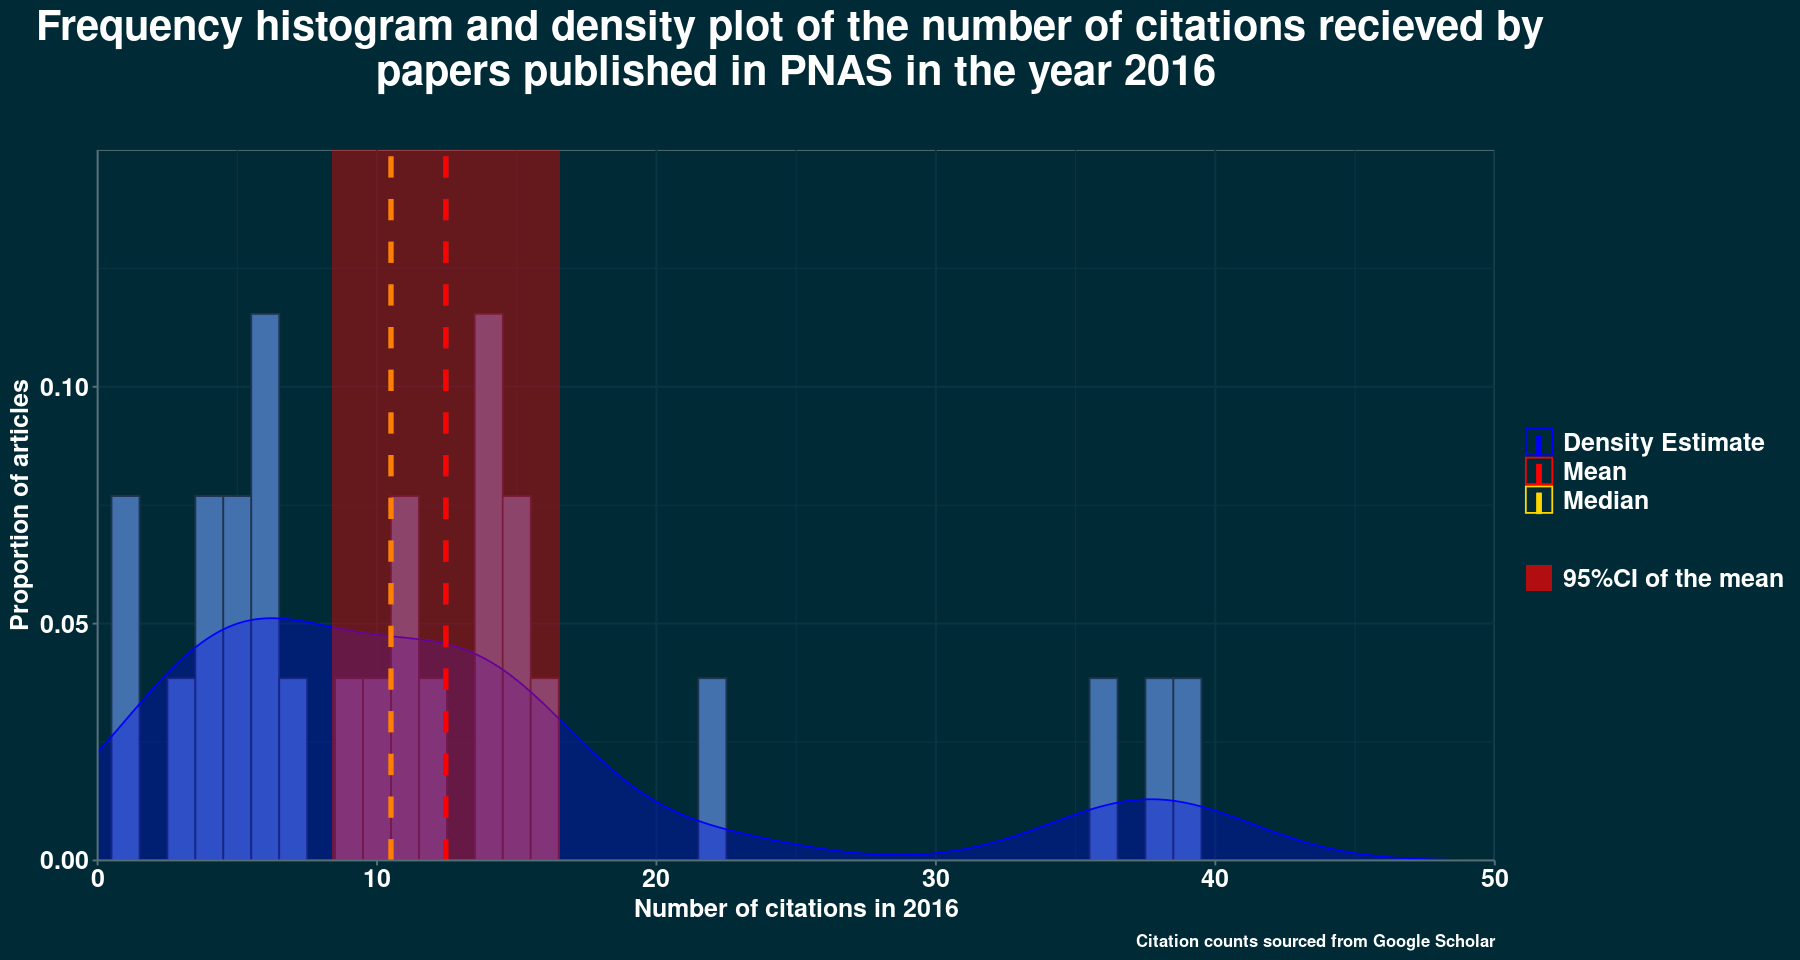

In [12]:
dens_plot + geom_rect(aes(xmin=CI[1],xmax=CI[2],ymin=0,ymax=Inf,fill="95%CI of the mean"),alpha=0.02) + scale_fill_manual(values=c("red"),guide=guide_legend(override.aes=list(fill='red',alpha=0.7)))

### Bootstrapping

We can also use bootstrapping to obtain a confidence interval for our data. In R, this is straightforward, using the boot package.

In [13]:
#Preparing functions for bootstrapping in the format boot needs
get_mean <- function(data,indices){   
    return (mean(data[indices]))
}

In [14]:
set.seed(123456789) #For reproducibility

#Make 10,000 bootstrap samples
bootstrap <- boot(sample$citation_counts,statistic = get_mean,R=10000)

In [15]:
boot.ci(boot.out=bootstrap,type=c('bca'))

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = bootstrap, type = c("bca"))

Intervals : 
Level       BCa          
95%   ( 9.08, 17.35 )  
Calculations and Intervals on Original Scale

As you can see, I've specified the type as 'bca'. bca stands for 'Bias Corrected and Accelerated', and is a method of interval estimation that is generally more robust than simply assuming normality the way we did. We can see that the interval predicted by this method is slightly different from what we had calculated earlier.

In [16]:
bootstrap_CI <- c(boot.ci(boot.out=bootstrap,type=c('bca'))[['bca']][4],boot.ci(boot.out=bootstrap,type=c('bca'))[['bca']][5])

cat("95% Confidence interval of the mean via bootstrapping is: ","[",bootstrap_CI[1],",",bootstrap_CI[2],"]")

95% Confidence interval of the mean via bootstrapping is:  [ 9.076923 , 17.34615 ]

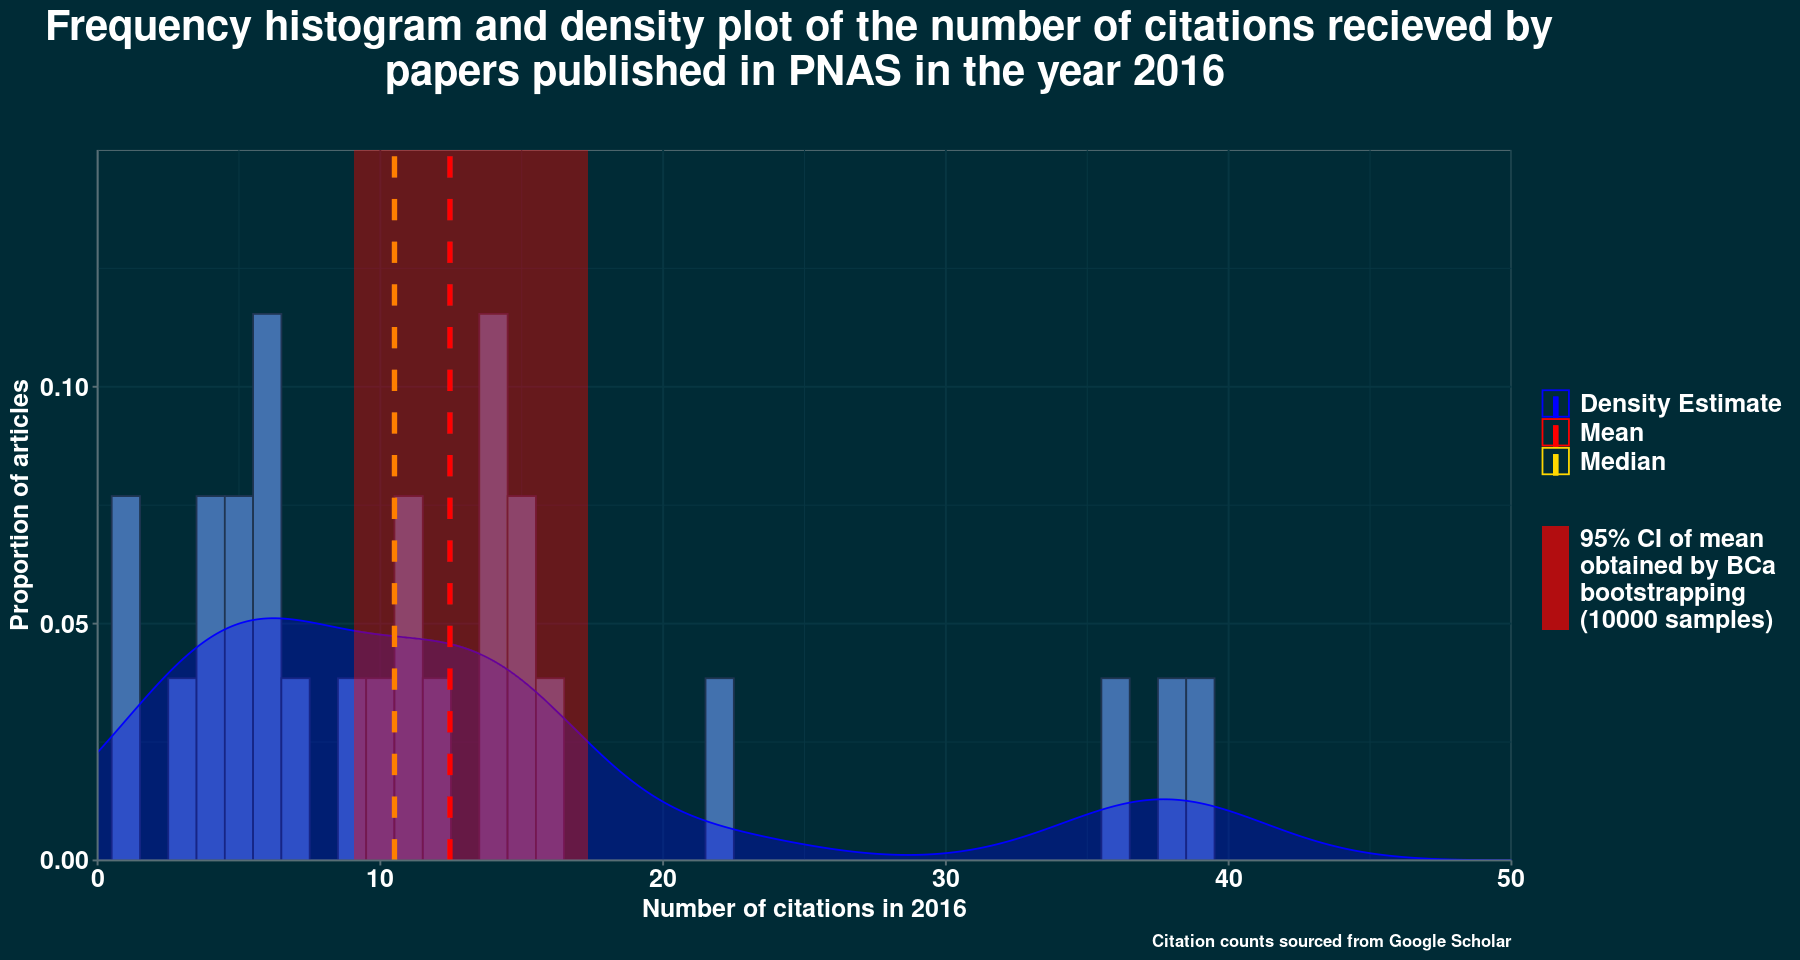

In [17]:
#Add the CI band
dens_plot <- dens_plot + geom_rect(aes(xmin=bootstrap_CI[1],xmax=bootstrap_CI[2],ymin=0,ymax=Inf,fill="95% CI of mean \nobtained by BCa \nbootstrapping \n(10000 samples)"),alpha=0.02) + scale_fill_manual(values=c("red"),guide=guide_legend(override.aes=list(fill='red',alpha=0.7)))

dens_plot

We can also see where the single review we had falls with respect to the confidence interval.

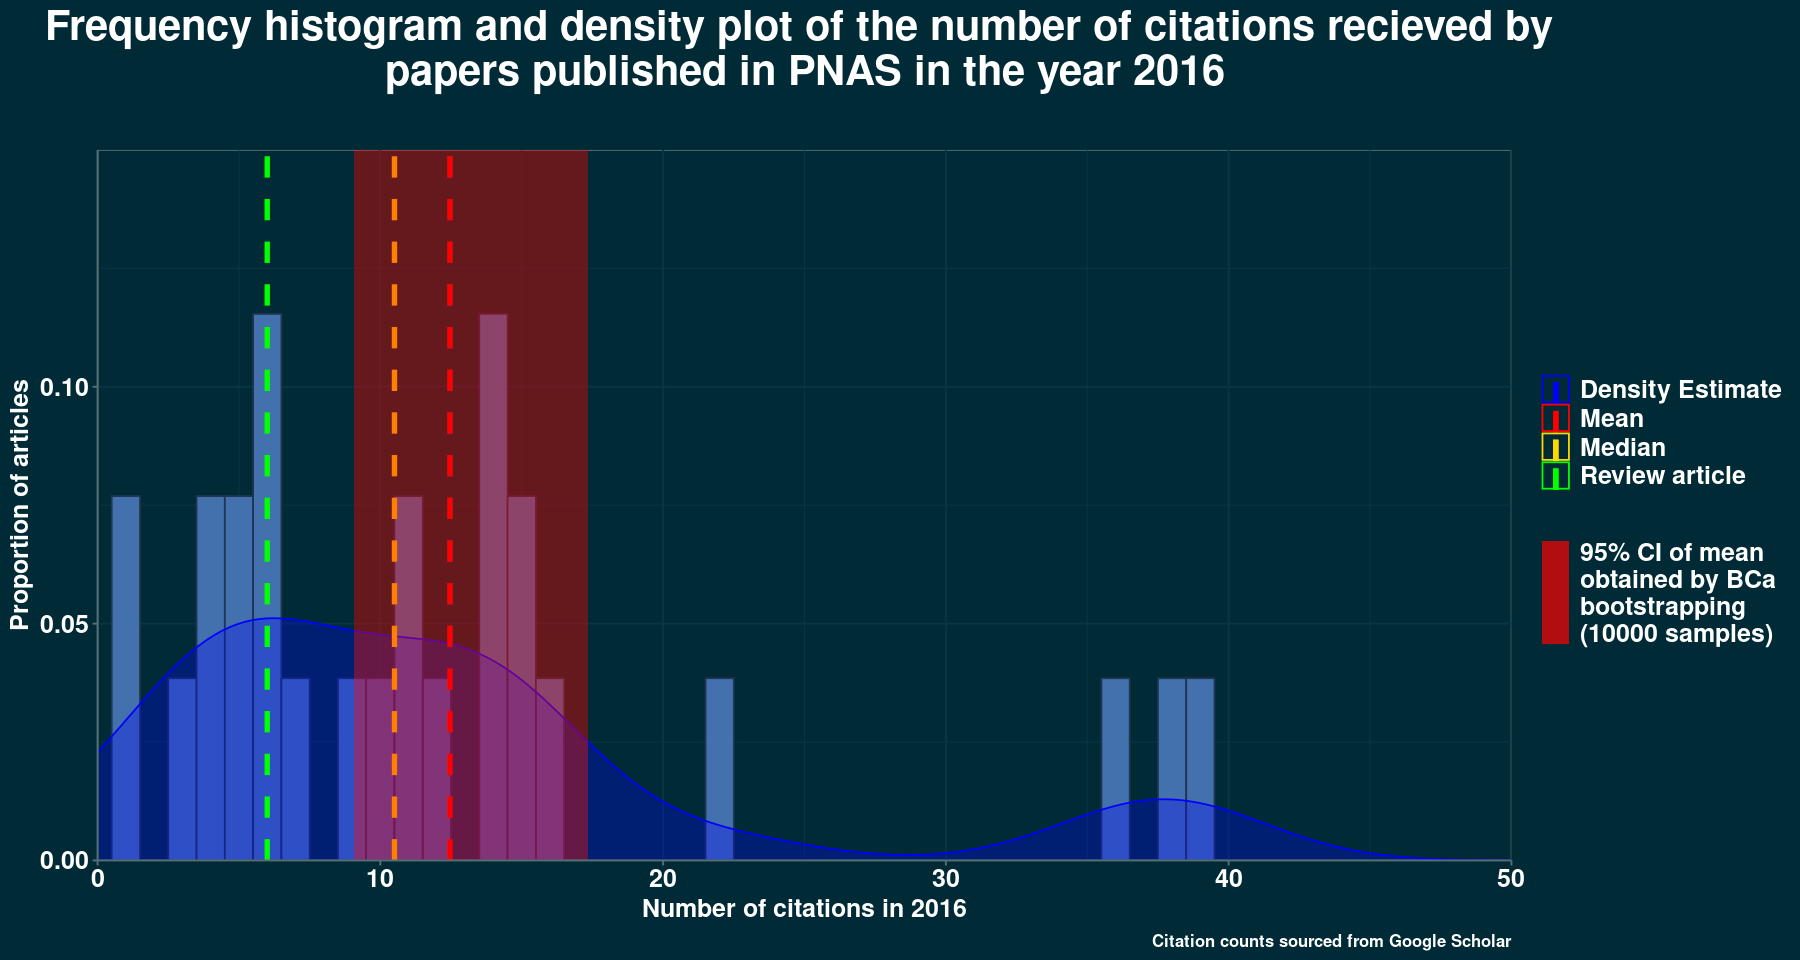

In [18]:
#Add a line for the review
dens_plot <- dens_plot + geom_vline(aes(xintercept=subset(sample,Document.Type == 'Review')$citation_count,color='Review article'),linetype='dashed',size=1.5)

suppressMessages(dens_plot <- dens_plot + scale_color_manual(values=c('blue','red','gold1','green')))

dens_plot

Our review falls out of the predicted 95% confidence interval for the mean, and from this (very limited) sample, we may conclude that reviews published in PNAS are *less* likely to recieve citations a year or two after publication (when compared to research articles).<br>
<br>
If our sample was a more balanced mix of reviews and research papers, we could perhaps have compared the two groups using a Mann-Whitney U test or a permutation test (or some other such test for comparing means of two groups). I would prefer to use non-parametric tests for such comparisons, since our sample size for each group will be relatively small, and so assumptions regarding underlying distributions may not be sound.

## Estimating the impact factor

We can now try to estimate the impact factor of PNAS for the year 2016 from our sample.

In [19]:
#Defining the function for impact factor

IF <- function(x,indices){ 
    return (sum(x[indices])/length(x[indices]))
}

In [20]:
#Sample IF

cat("Impact factor from the sample: ",IF(sample$citation_counts,seq(1,length(sample$citation_counts))))

Impact factor from the sample:  12.46154

We can also use bootstrapping to obtain several estimates. I obtain 10,000 here.

In [21]:
IF_boot <- boot(sample$citation_counts,IF,R=10000)

#Actual impact factor of PNAS in 2016
population_IF <- 10.467

In [22]:
boot.ci(boot.out=IF_boot,type=c('bca'))

IF_CI <- c(boot.ci(boot.out=IF_boot,type=c('bca'))[['bca']][4],boot.ci(boot.out=IF_boot,type=c('bca'))[['bca']][5])

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = IF_boot, type = c("bca"))

Intervals : 
Level       BCa          
95%   ( 9.12, 17.31 )  
Calculations and Intervals on Original Scale

In [23]:
cat("The predicted 95% Confidence interval for the impact factor is: ","[",IF_CI[1],",",IF_CI[2],"]")

The predicted 95% Confidence interval for the impact factor is:  [ 9.115385 , 17.30769 ]

We can also plot our data on a frequency histogram, along with the population value (the 'actual value') of the impact factor, to examine the accuracy of our methods.

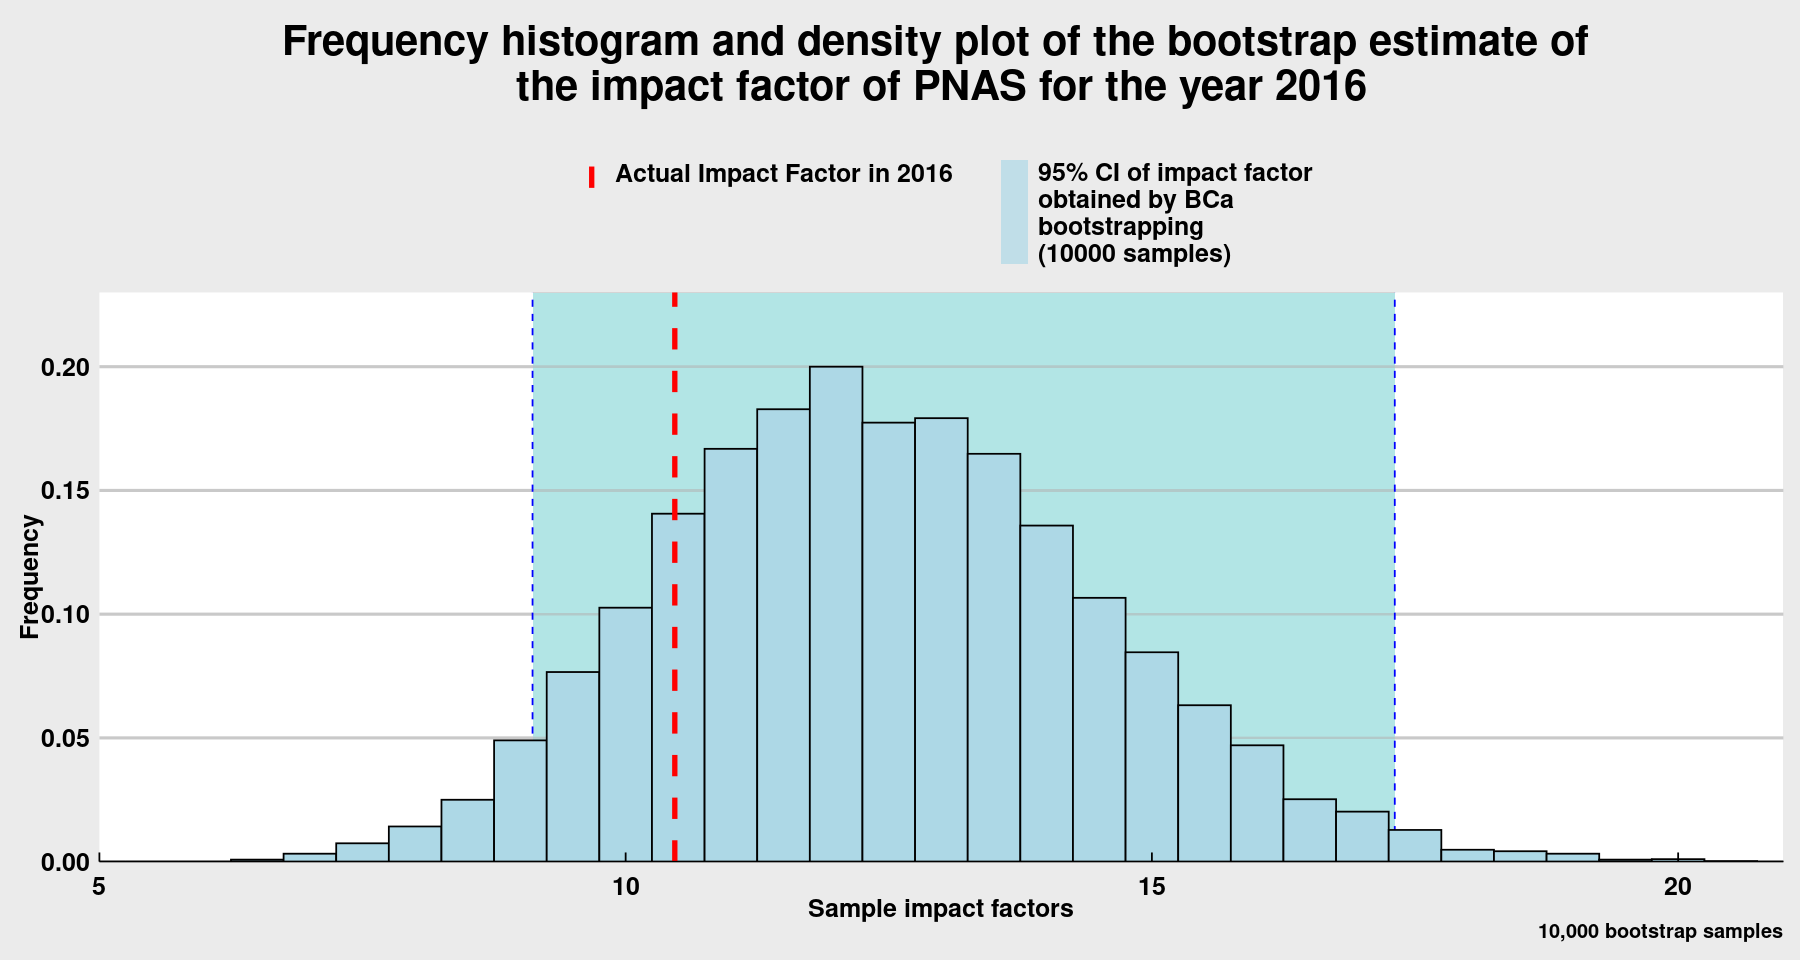

In [24]:
#Set the figsize
figsize(15,8)

#Add the 95% CI
IF_plot <- ggplot(as.data.frame(IF_boot$t),aes(x=V1)) + geom_rect(aes(xmin=IF_CI[1],xmax=IF_CI[2],ymin=0,ymax=Inf,fill="95% CI of impact factor \nobtained by BCa \nbootstrapping \n(10000 samples)"),color=NA,alpha=0.02)
IF_plot <- IF_plot + geom_vline(aes(xintercept=IF_CI[1]),color='blue',linetype='dashed',size=0.5)
IF_plot <- IF_plot + geom_vline(aes(xintercept=IF_CI[2]),color='blue',linetype='dashed',size=0.5)


#Add the histogram
IF_plot <- IF_plot + geom_histogram(binwidth=0.5,color='black',fill='lightblue',alpha=1,aes(y=..density..))


#Add the population value
IF_plot <- IF_plot + geom_vline(aes(xintercept=population_IF,color='Actual Impact Factor in 2016'),linetype='dashed',size=1.5)

#Add axis and legend labels
IF_plot <- IF_plot + labs(x="Sample impact factors",y="Frequency",caption="10,000 bootstrap samples")
IF_plot <- IF_plot + ggtitle("Frequency histogram and density plot of the bootstrap estimate of \n the impact factor of PNAS for the year 2016 \n")

#Some aesthetic changes

IF_plot <- IF_plot +theme_economist_white()

#Make axis labels bold
IF_plot <-IF_plot + theme(axis.text = element_text(face = 'bold', color = 'black',size = 15)) + theme(axis.title = element_text(face = 'bold',color = 'black',size = '15'))

#Make legend, title, and caption labels bold
IF_plot <- IF_plot + theme(legend.title = element_text(face='bold', color = 'black',size = 15),legend.text=element_text(face='bold', color = 'black',size = 15))
IF_plot <- IF_plot + theme(plot.caption = element_text(face='bold', color = 'black',size = 12,hjust=1))
IF_plot <- IF_plot + theme(plot.title = element_text(face='bold', color = 'black',size = 25,hjust=0.5))

#Remove the gap b/w bars and x-axis, and also set the y limits of the plot
IF_plot <- IF_plot + scale_y_continuous(expand = c(0,0),limits = c(0,0.23)) + scale_x_continuous(expand = c(0,0),limits = c(5,21),oob = scales::oob_keep)

#Change the colors to something clearly visible.
IF_plot <- IF_plot + scale_fill_manual(values=c('lightblue'),guide=guide_legend(override.aes=list(fill='lightblue',alpha=0.7)))
IF_plot <- IF_plot + scale_color_manual(values=c('red'))

#Make the legend prettier
IF_plot <- IF_plot + theme(legend.title=element_blank(),legend.key = element_rect(fill = NA),legend.background = element_rect(color = NA))

#View the plot
IF_plot

We see that the population value is well within our 95% confidence interval.